# Data Preprocessing and Analysis

## Importing Libraries

In this section, we import the necessary libraries for data manipulation, visualization, and model building.

In [2]:
import numpy as np                # Library for numerical operations
import pandas as pd               # Library for data manipulation and analysis
import matplotlib.pyplot as plt   # Library for creating visualizations
import seaborn as sns             # Data visualization library based on Matplotlib
import os                         # Operating System dependent functionalities
import missingno as msno          # Library for visualizing missing data patterns
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Preprocessing techniques
from sklearn.linear_model import LogisticRegression   # Import Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
import warnings                   # Library to handle warnings
warnings.filterwarnings("ignore") # Ignore warnings

# Importing Data
We load the dataset into the notebook using Pandas:


In [3]:
train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

## Exploring Data
To get an initial understanding of the data, we first take a look at the top rows:

In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## Data Visualization
We create visualizations to understand the distribution of the target variable and explore relationships between features:

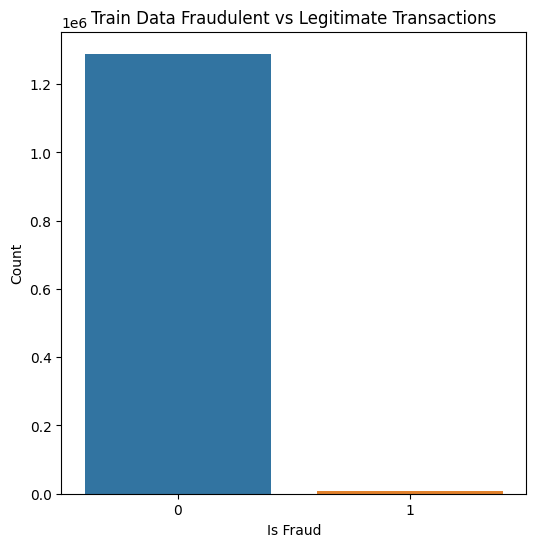

In [7]:
fraud_counts = train_data['is_fraud'].value_counts()
plt.figure(figsize=(6, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Train Data Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

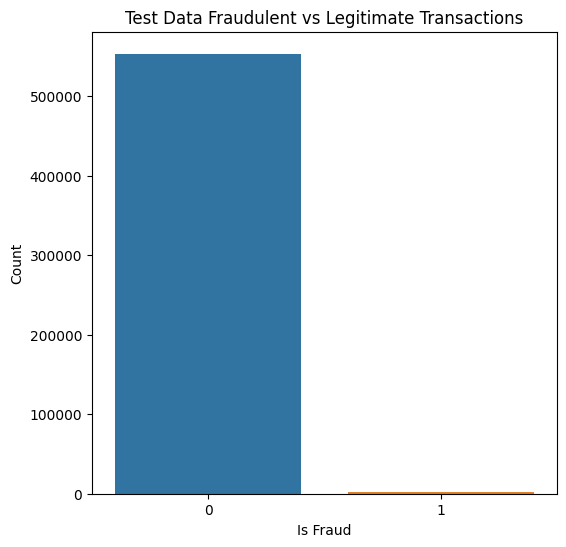

In [8]:
fraud_counts = test_data['is_fraud'].value_counts()
plt.figure(figsize=(6, 6))
sns.countplot(x='is_fraud', data=test_data)
plt.title('Test Data Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

## Data Preprocessing and Cleaning
To get an initial understanding of the data, we first take a look at the top rows:

In [9]:
# Checking for missing values in both datasets
train_data.isnull().sum(), test_data.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [10]:
# Dropping unnecessary columns from both datasets
cols_to_drop = ['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','category']
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

In [11]:
train_data.shape

(1296675, 14)

In [12]:
test_data.shape

(555719, 14)

In [13]:
# Calculating distance between geographical coordinates
train_data['lat_dist'] = abs(round(train_data['merch_lat'] - train_data['lat'], 2))
train_data['long_dist'] = abs(round(train_data['merch_long'] - train_data['long'], 2))

test_data['lat_dist'] = abs(round(test_data['merch_lat'] - test_data['lat'], 2))
test_data['long_dist'] = abs(round(test_data['merch_long'] - test_data['long'], 2))

# Dropping more columns related to location and personal information
cols_to_drop = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long', 'state']
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

In [14]:
train_data.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,F,28654,3495,0,0.07,0.87
1,107.23,F,99160,149,0,0.27,0.02
2,220.11,M,83252,4154,0,0.97,0.11
3,45.00,M,59632,1939,0,0.80,0.45
4,41.96,M,24433,99,0,0.25,0.83


In [16]:
# Converting 'gender' column to binary values (1 for 'M', 0 otherwise)
train_data.gender = [1 if value == "M" else 0 for value in train_data.gender]
test_data.gender = [1 if value == "M" else 0 for value in test_data.gender]

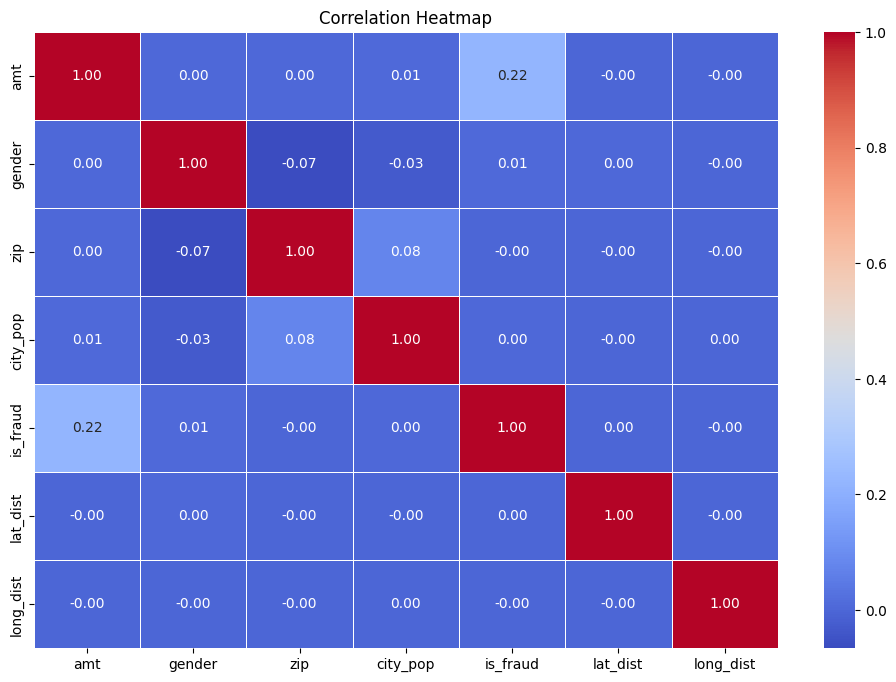

In [17]:
# Drop non-numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Splitting Data

In [18]:
# Separating features and target variable for both training and testing datasets
X_train = train_data.drop('is_fraud', axis=1)
X_test = test_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
y_test = test_data['is_fraud']

# Importing the SMOTE module from imbalanced-learn library to address class imbalance
from imblearn.over_sampling import SMOTE

# Creating an instance of SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Applying SMOTE to oversample the minority class in the training data
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Model Building and Evaluation
Here we build machine learning models and evaluate their performance on the test dataset:

In [19]:
# Importing StandardScaler from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Scaling the features in the training set (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Scaling the features in the testing set (X_test)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=45)

# Fitting the Decision Tree Classifier on the training data
dtc.fit(X_train, y_train)

# Predicting using the trained model on the test data
y_pred = dtc.predict(X_test)

In [21]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


# Decision Tree Visualization

Visualizing the entire decision tree can be complex, so here, we're showing only the first few levels of the decision tree. The `max_depth` parameter determines the depth of the tree. A lower `max_depth` value displays fewer levels, providing a simpler visualization.

For instance, in the visualization below, we've set `max_depth=2`. This shows only the first two levels of the decision tree. Choosing a smaller depth results in a less complex visualization.


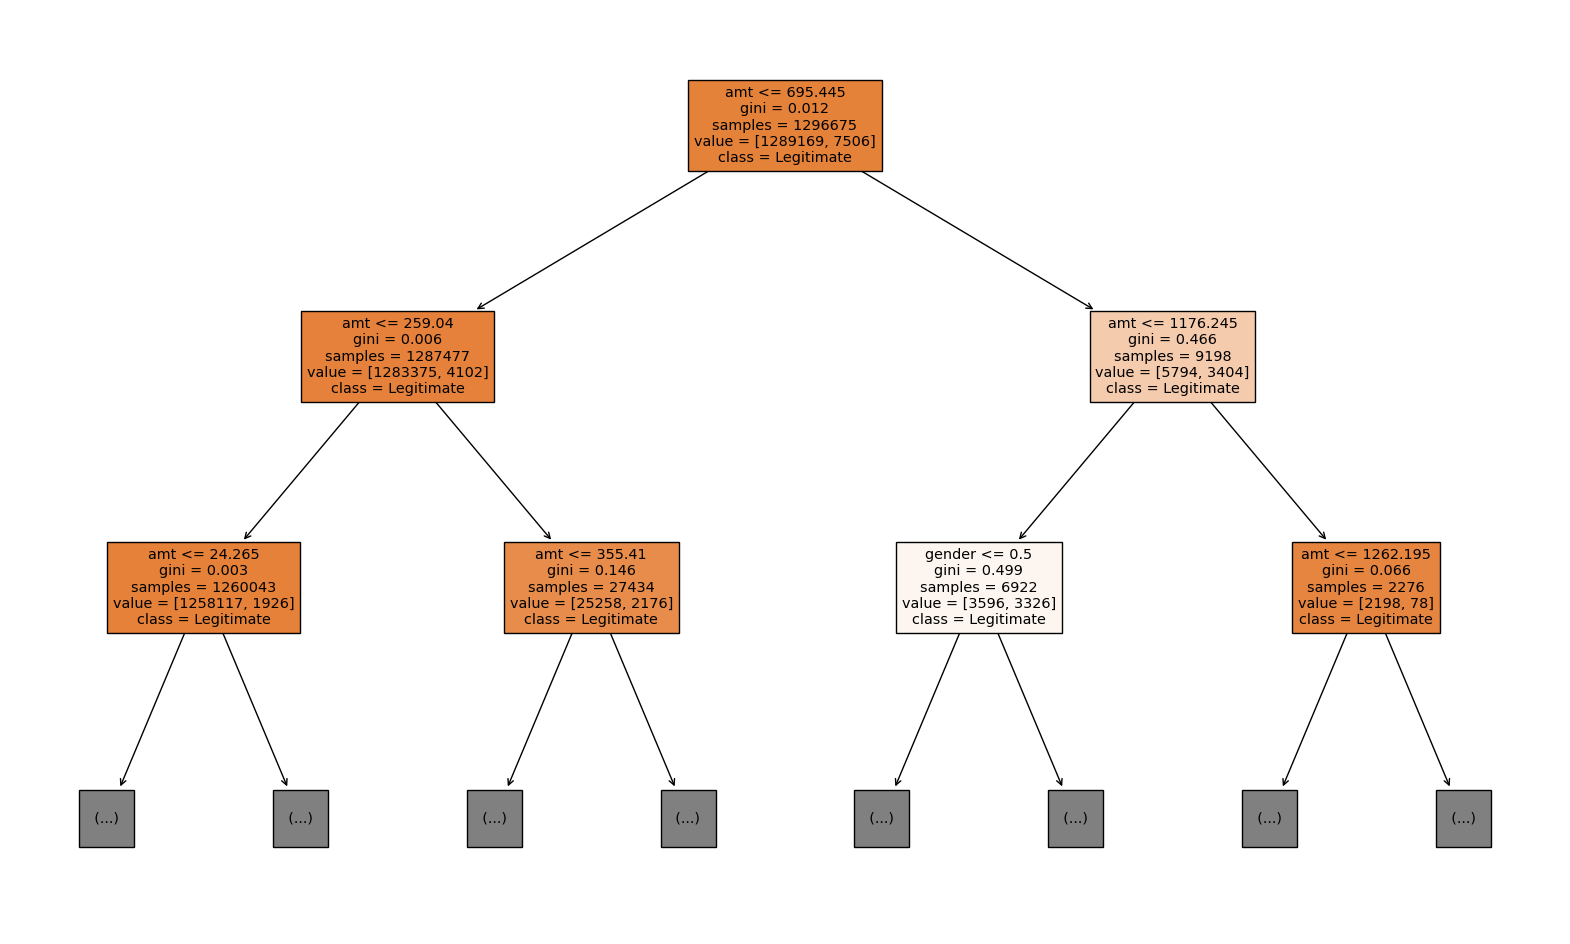

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(dtc, feature_names=X_train.columns, class_names=['Legitimate', 'Fraud'], max_depth=2, filled=True)
plt.show()

## Conclusion
In this notebook, we performed exploratory data analysis, data preprocessing, built a machine learning model, and evaluated its performance for fraud detection.